In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv")

In [5]:
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())
print("\nDuplicate rows in Customers:", customers.duplicated().sum())
print("Duplicate rows in Products:", products.duplicated().sum())
print("Duplicate rows in Transactions:", transactions.duplicated().sum())

Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate rows in Customers: 0
Duplicate rows in Products: 0
Duplicate rows in Transactions: 0


In [7]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [8]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

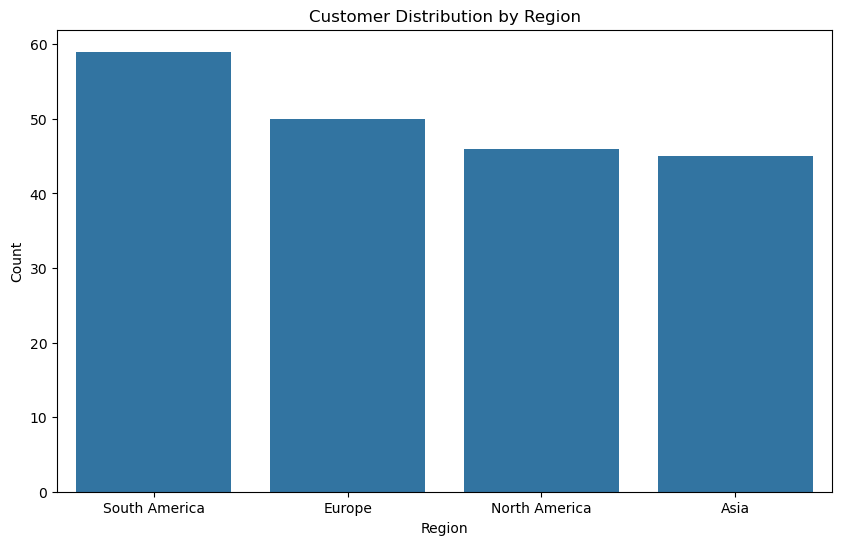

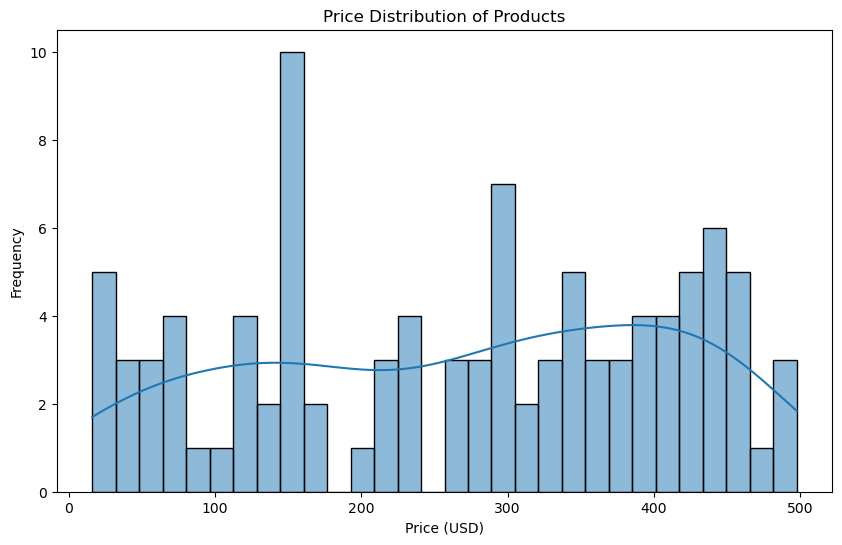

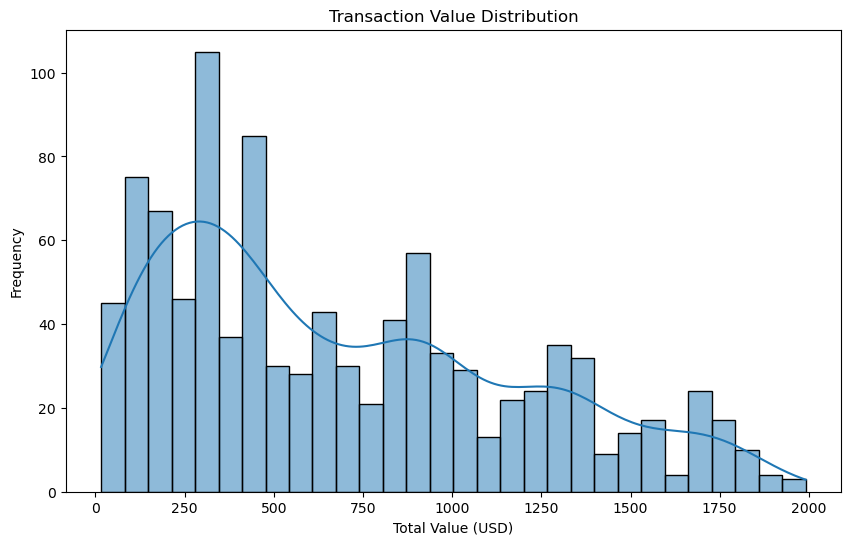

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=products, x='Price', bins=30, kde=True)
plt.title("Price Distribution of Products")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=transactions, x='TotalValue', bins=30, kde=True)
plt.title("Transaction Value Distribution")
plt.xlabel("Total Value (USD)")
plt.ylabel("Frequency")
plt.show()

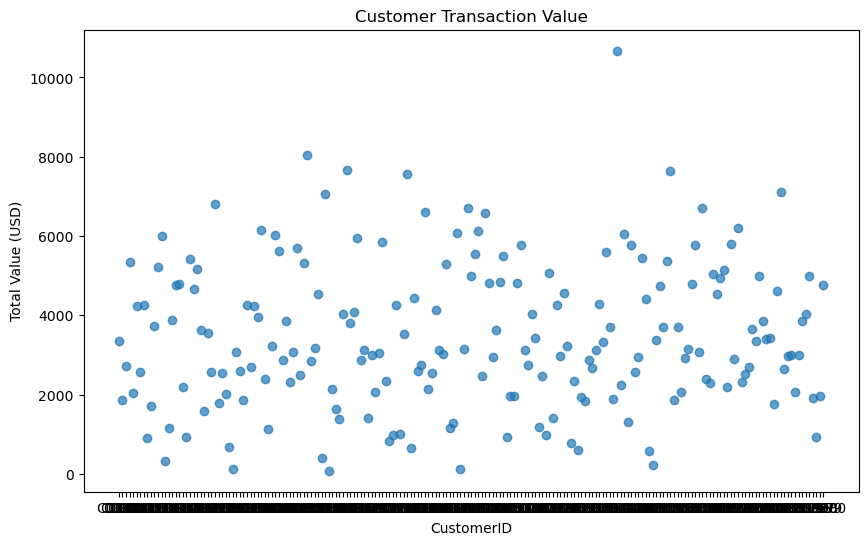

In [10]:
# Relationship between variables: CustomerID and Transaction Value
customer_transaction_value = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(customer_transaction_value['CustomerID'], customer_transaction_value['TotalValue'], alpha=0.7)
plt.title("Customer Transaction Value")
plt.xlabel("CustomerID")
plt.ylabel("Total Value (USD)")
plt.show()


In [11]:
avg_transaction_value = transactions['TotalValue'].mean()
top_selling_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print(f"Average Transaction Value: ${avg_transaction_value:.2f}")
print("Top Selling Products:\n", top_selling_products)

Average Transaction Value: $690.00
Top Selling Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


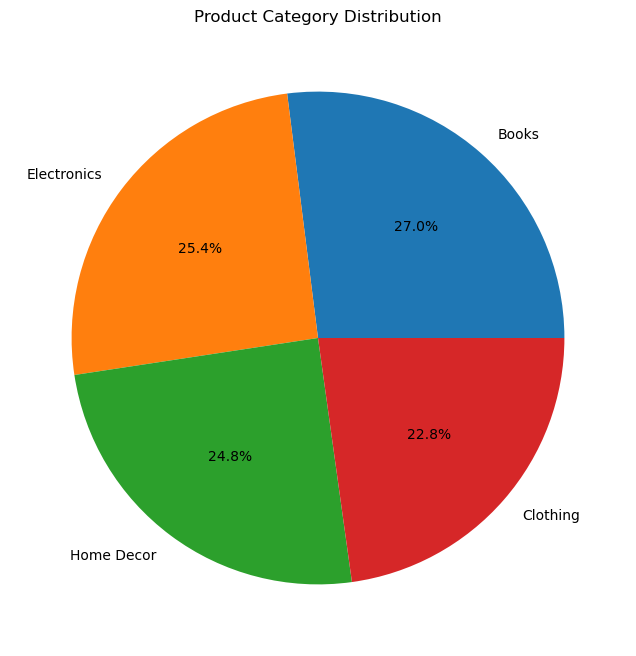

In [12]:
plt.figure(figsize=(8, 8))
merged_data['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Product Category Distribution")
plt.ylabel("")
plt.show()